In [1]:
# Import necessary libraries
# These libraries are the backbone for data analysis and visualization.
import pandas as pd  # For handling and analyzing structured data
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced and appealing statistical graphics

In [2]:
# Load the dataset
# We load the heart disease data into a pandas DataFrame for structured analysis.
data_path = 'heart_disease.csv'  # Path to the dataset
heart_data = pd.read_csv(data_path)  # Load the CSV file into a DataFrame


In [26]:
# Display the first few rows of the dataset to understand its structure
print("Initial Dataset Preview:")
print(heart_data.head())

Initial Dataset Preview:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0       

In [4]:
# Step 1: Handle Missing Data
# Missing values can affect analysis, so we clean the dataset.
# For numerical columns, we fill missing values with the median.
# For categorical columns, we fill missing values with the most frequent value (mode).
heart_data_cleaned = heart_data.copy()  # Create a copy to avoid altering the original dataset
for column in heart_data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    heart_data_cleaned[column].fillna(heart_data_cleaned[column].median(), inplace=True)
for column in heart_data_cleaned.select_dtypes(include=['object']).columns:
    heart_data_cleaned[column].fillna(heart_data_cleaned[column].mode()[0], inplace=True)

In [34]:
a = input('What is your name....')


In [5]:
# Verify if missing values are handled
print("\nMissing Values after Cleaning:")
print(heart_data_cleaned.isnull().sum())


Missing Values after Cleaning:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


In [6]:
# Step 2: Summary Statistics for Numerical Features
# This provides insights into the central tendency and spread of numerical data.
print("\nSummary Statistics:")
summary_stats = heart_data_cleaned.describe()  # Generate descriptive statistics
print(summary_stats)


Summary Statistics:
                Age  Blood Pressure  Cholesterol Level           BMI  \
count  10000.000000    10000.000000       10000.000000  10000.000000   
mean      49.295400      149.758200         225.427300     29.077274   
std       18.167574       17.556268          43.510401      6.300156   
min       18.000000      120.000000         150.000000     18.002837   
25%       34.000000      134.000000         187.000000     23.668887   
50%       49.000000      150.000000         226.000000     29.079492   
75%       65.000000      165.000000         263.000000     34.509009   
max       80.000000      180.000000         300.000000     39.996954   

        Sleep Hours  Triglyceride Level  Fasting Blood Sugar     CRP Level  \
count  10000.000000        10000.000000         10000.000000  10000.000000   
mean       6.991359          250.732500           120.141900      7.472200   
std        1.751002           86.953962            23.558053      4.334601   
min        4.00060


Plotting Numerical Data Distributions...


<Figure size 1600x800 with 0 Axes>

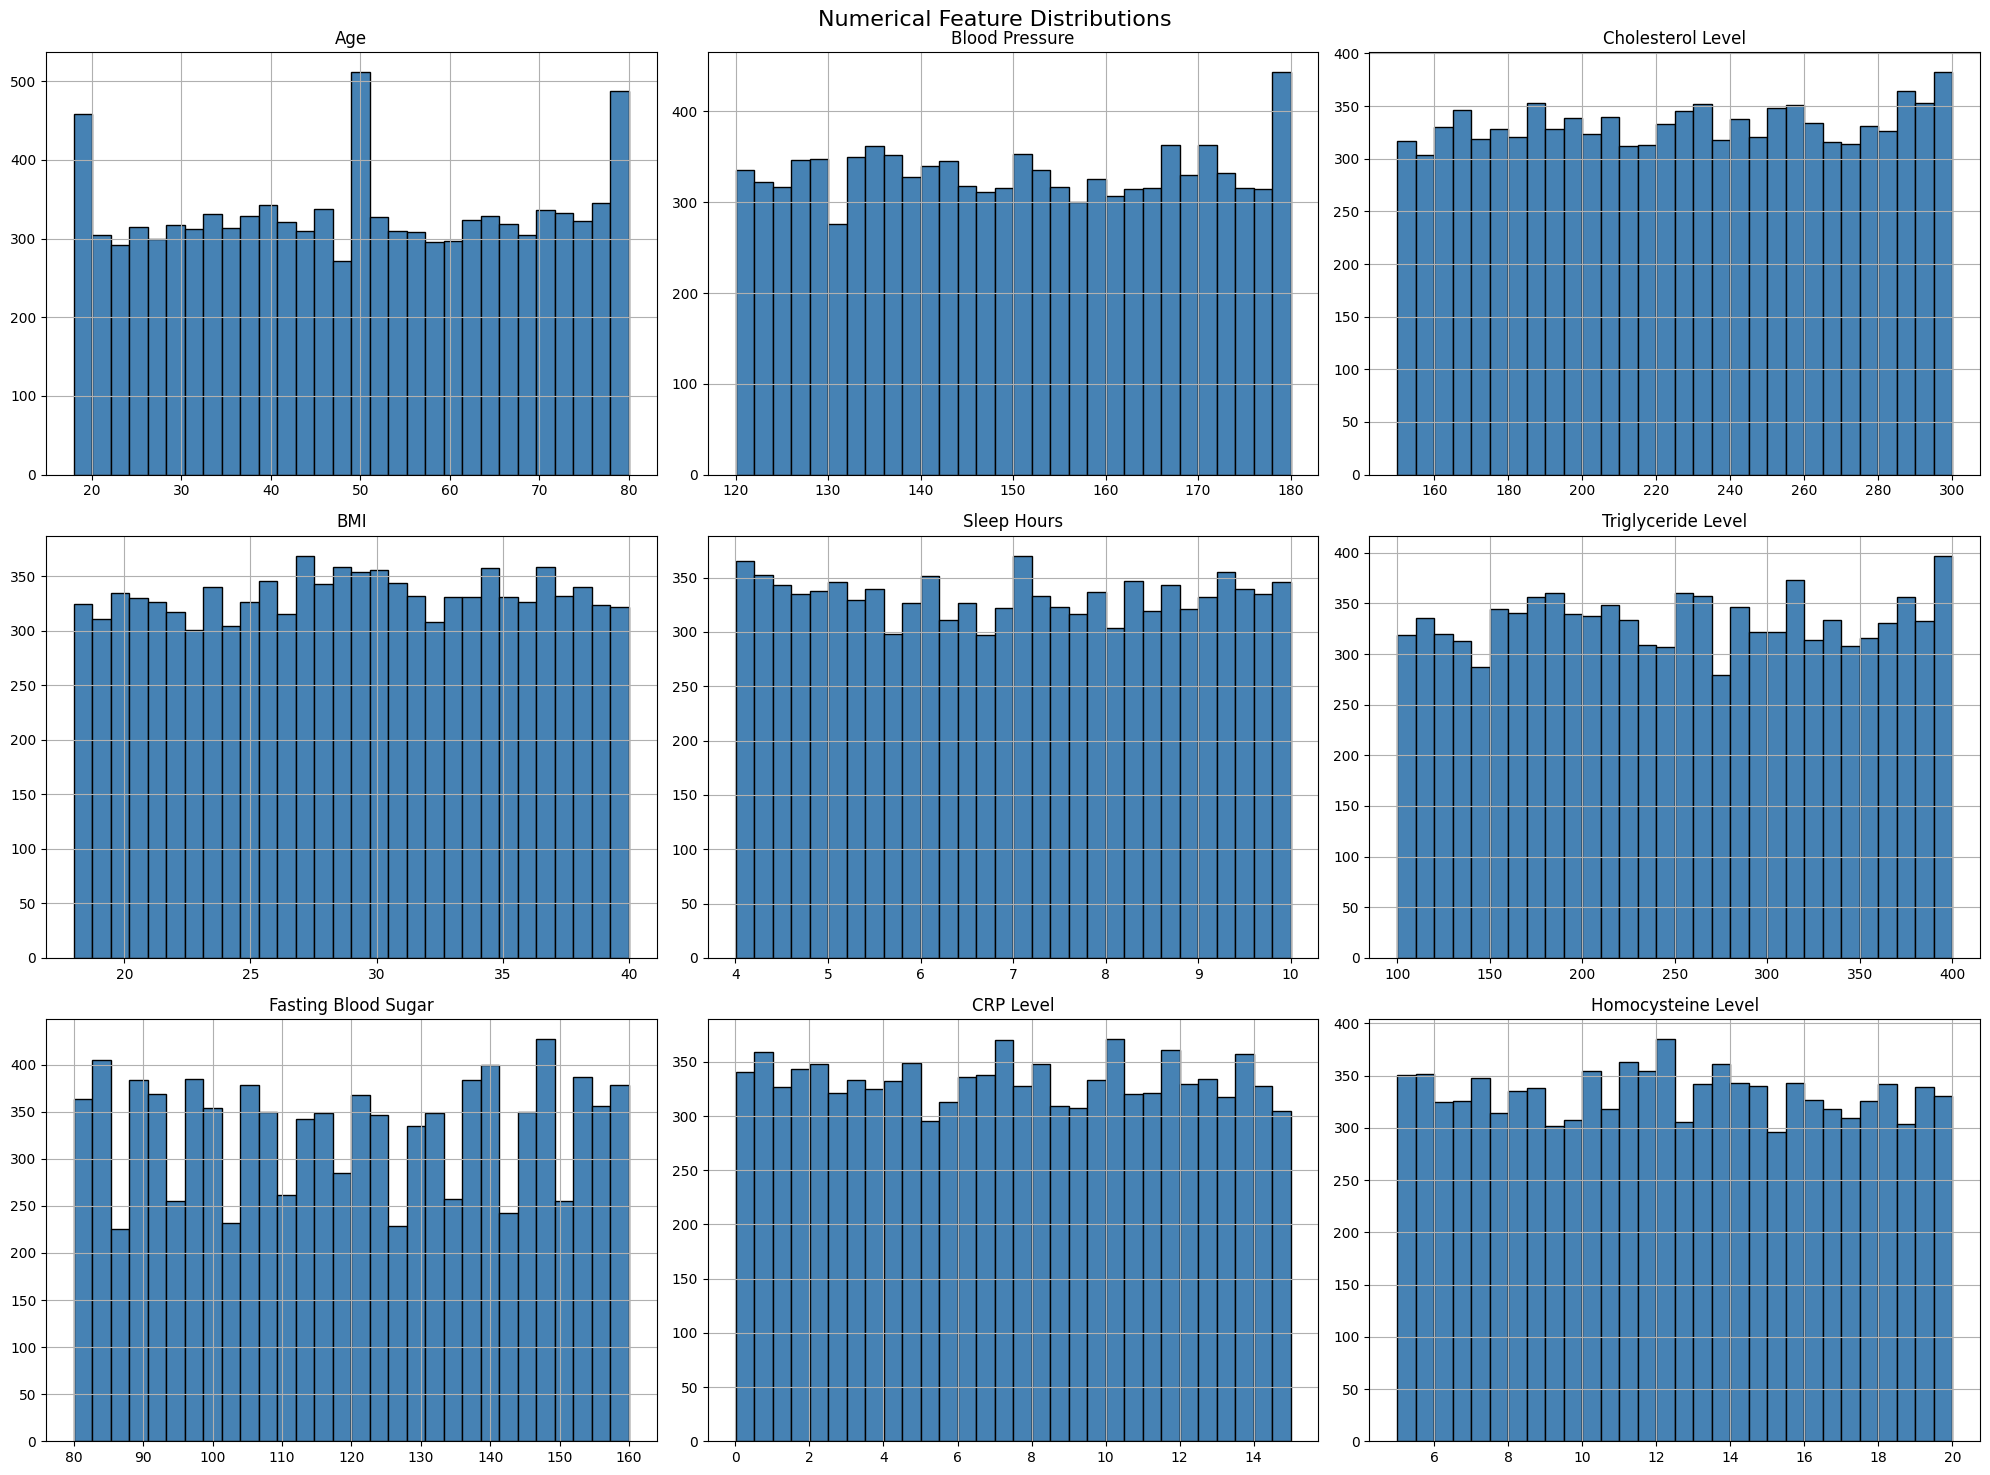

In [7]:
# Step 3: Visualizing Numerical Data Distributions
# Histograms allow us to understand how data is distributed for each numerical feature.
print("\nPlotting Numerical Data Distributions...")
plt.figure(figsize=(16, 8))  # Set the figure size
heart_data_cleaned.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')  # Generate histograms
plt.suptitle("Numerical Feature Distributions", fontsize=16)  # Add a title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [11]:
# Step 4: Correlation Analysis
# Correlation shows how strongly numerical features are related to each other.
print("\nCalculating Correlation Matrix...")
# Selecting only numerical columns for correlation matrix
numerical_columns = heart_data_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()  # Compute correlations


Calculating Correlation Matrix...


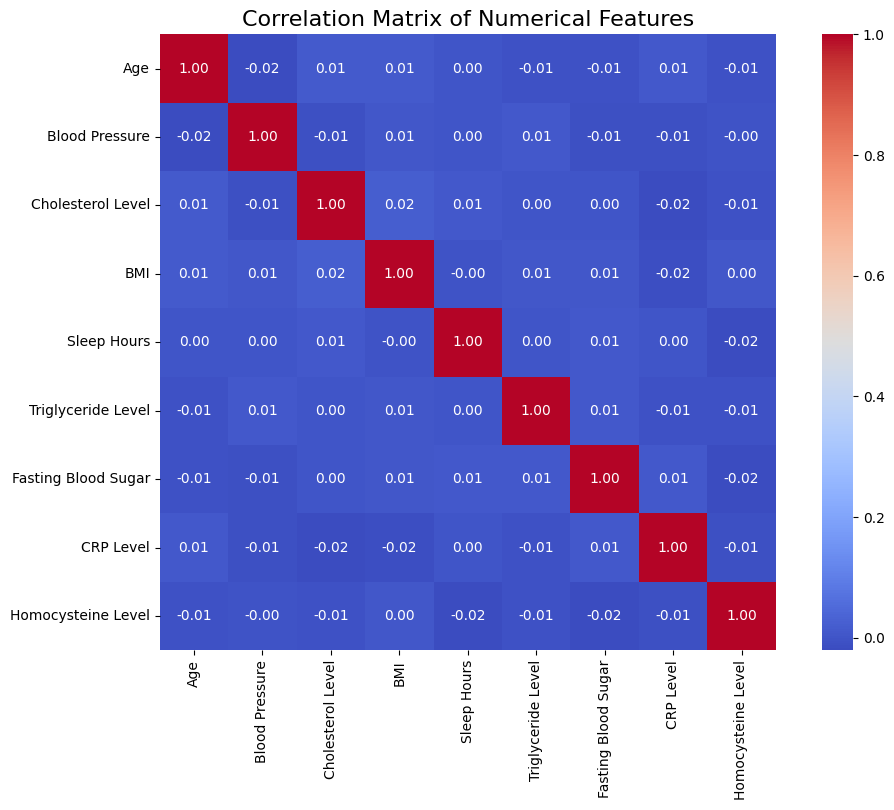

In [12]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)  # Plot the heatmap
plt.title("Correlation Matrix of Numerical Features", fontsize=16)  # Add a title
plt.show()


In [13]:
# Step 5: Insights from Data Distributions
# Analyzing insights from key numerical features.
print("\nKey Insights:")
# Age distribution
print("The average age is {:.1f} years, ranging from {:.0f} to {:.0f} years.".format(
    heart_data_cleaned['Age'].mean(), heart_data_cleaned['Age'].min(), heart_data_cleaned['Age'].max()))
# Cholesterol level insights
print("The average cholesterol level is {:.1f} mg/dL, with high variance indicating potential outliers.".format(
    heart_data_cleaned['Cholesterol Level'].mean()))
# BMI insights
print("The average BMI is {:.1f}, with many individuals in the overweight category (>25).".format(
    heart_data_cleaned['BMI'].mean()))
# Sleep insights
print("The average sleep hours are {:.1f}, with most individuals getting between 5 and 8 hours.".format(
    heart_data_cleaned['Sleep Hours'].mean()))


Key Insights:
The average age is 49.3 years, ranging from 18 to 80 years.
The average cholesterol level is 225.4 mg/dL, with high variance indicating potential outliers.
The average BMI is 29.1, with many individuals in the overweight category (>25).
The average sleep hours are 7.0, with most individuals getting between 5 and 8 hours.


In [14]:
# Step 6: Categorical Feature Analysis
# Analyze the distribution of categorical variables, such as "Heart Disease Status".
print("\nHeart Disease Status Distribution:")
print(heart_data_cleaned['Heart Disease Status'].value_counts())



Heart Disease Status Distribution:
Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64


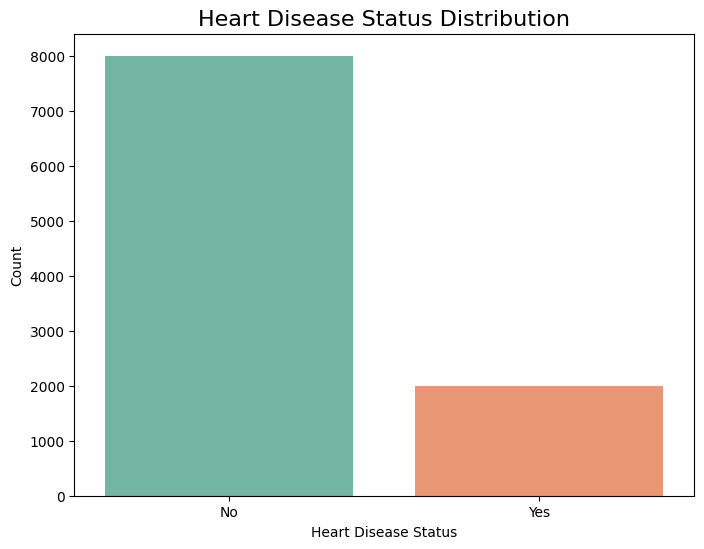

In [16]:
# Visualizing the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_data_cleaned, x='Heart Disease Status', hue='Heart Disease Status', dodge=False, palette='Set2')  # Updated count plot
plt.title("Heart Disease Status Distribution", fontsize=16)  # Add a title
plt.xlabel("Heart Disease Status")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.legend([],[], frameon=False)  # Remove legend as hue is redundant
plt.show()


In [17]:
# Step 7: Feature-to-Target Relationships
# Explore relationships between key features and "Heart Disease Status".
print("\nAnalyzing Relationships with Heart Disease Status...")
key_features = ['Age', 'Cholesterol Level', 'BMI', 'Triglyceride Level']  # Select features of interest



Analyzing Relationships with Heart Disease Status...


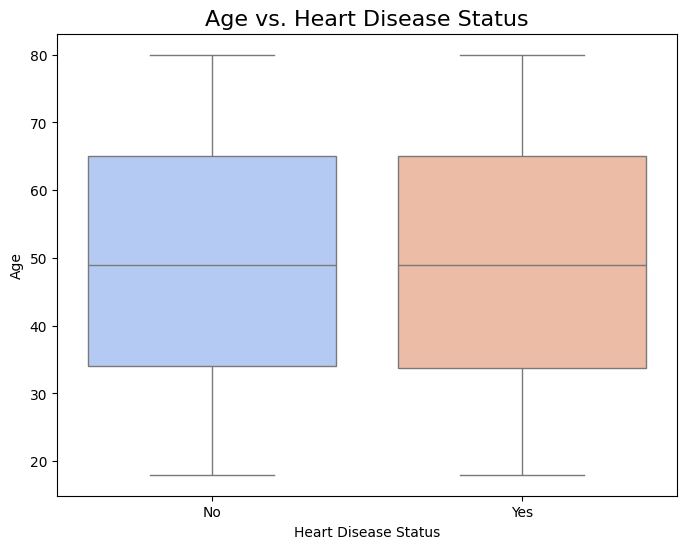

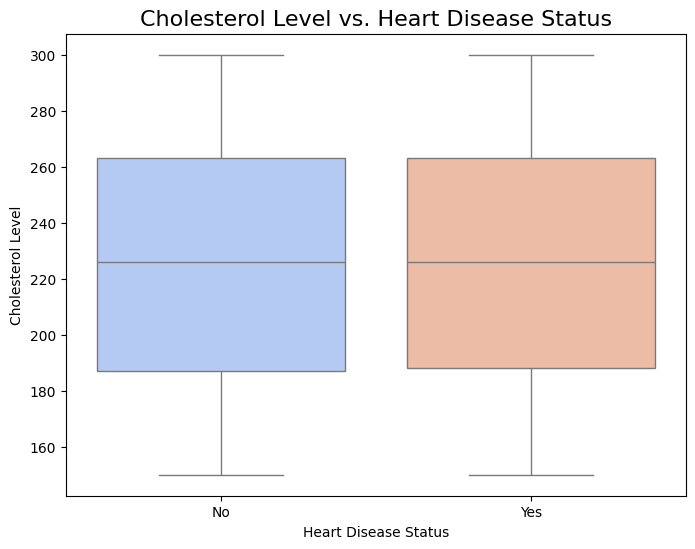

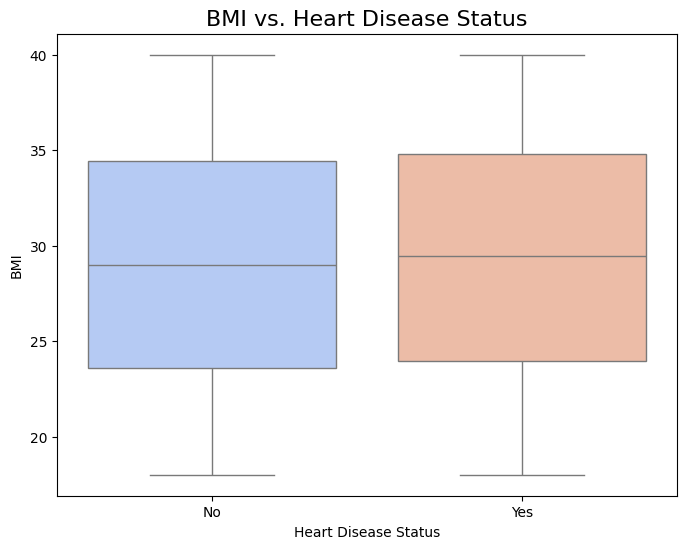

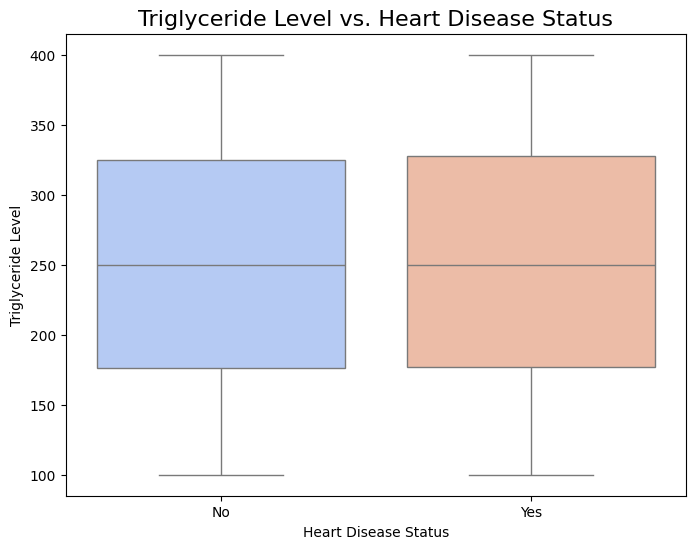

In [24]:
# Create boxplots for each key feature against the target variable
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=heart_data_cleaned, x='Heart Disease Status', y=feature, hue='Heart Disease Status', dodge=False, palette='coolwarm')  # Added hue
    plt.title(f"{feature} vs. Heart Disease Status", fontsize=16)
    plt.xlabel("Heart Disease Status")
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  # Remove redundant legend
    plt.show()
